In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import *
from sympy import *
from scipy.interpolate import CubicSpline

In [2]:
#Estableciendo lista de los puntos dados
x  = [3.0, 4.5, 7.0, 9.0];
y = [2.5, 1.0, 2.5, 0.5];

#Convirtiendo las listas a arrays
x = np.array(x)
y = np.array(y)

In [3]:
if np.size(x) != np.size(y):
    print('El tamaño de los datos de entra son disparejos.')

In [4]:
N = np.size(x)-1
h = x[1:N+1] - x[0:N]
a = y
l = []
l = np.array(l)
m = []
m = np.array(m)

In [5]:
for i in range(N):
    l = np.append(l,((a[i+1]-a[i])/h[i]))#Se parece a una pendiente
l = np.append(l,0)

for i in range(1,N):
    m = np.append(m,3*(l[i]-l[i-1]))
    
m = np.insert(m,0,0)
m = np.append(m,0)

#Matriz A
A = np.zeros((np.size(m), np.size(m)))
#print(np.shape(A))
#print(A)
A[0,0] = 1
#print(A)
for i in range(1,N):
    A[i,i-1:i+2] = [h[i-1], 2*(h[i-1]+h[i]), h[i]]
    A[N,N] = 1

In [6]:
#Coeficiente c
c = np.dot(np.linalg.inv(A),m)
#print(Coeff)

#Coeficiente b ecuacion 16.21
b = []
b = np.array(b)
for i in range(N):
    b = np.append(b,l[i]-h[i]*(2*c[i]+c[i+1])/3)
#print(b)

#Coeficiente d ecuacion 16.18
d = []
d = np.array(d)
for i in range(N):
    d = np.append(d,(c[i+1]-c[i])/(3*h[i]))
#print(d)
#ecuacion 16.12

X_ =[]
curva_=[]
f = 0
for i in range(N):
    X = np.arange(x[i], x[i+1]+0.01, 0.01)
    curva = a[i] + b[i]*(X-x[i]) + c[i]*((X-x[i]))**2 + d[i]*((X-x[i]))**3
    f += 3
    X_ =  np.append(X_,X)
    curva_ = np.append(curva_,curva)

In [7]:
#Funcion PYTHON
xs = np.arange(x[0], x[N]+.1, 0.1 )
cs = CubicSpline(x, y)


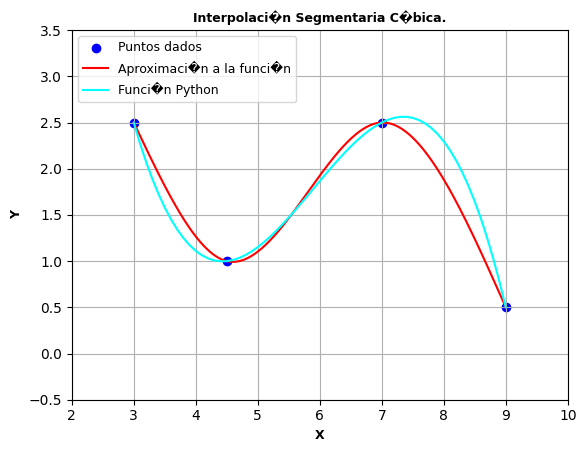

In [8]:
fig, ax = plt.subplots()
#plt.hold(True)
ax.scatter(x, y,color='blue',label = 'Puntos dados')
ax.plot(X_, curva_,color='red', label = 'Aproximacion a la funcion')
ax.set_title('Interpolacion Segmentaria Cubica.', loc = "center", fontdict = {'fontsize':9, 'fontweight':'bold', 'color':'black'})
ax.set_xlabel("X", fontdict = {'fontsize':9, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Y", fontdict = {'fontsize':9, 'fontweight':'bold', 'color':'black'})
ax.grid()
plt.xlim(min(x)-1,max(x)+1)
plt.ylim(min(y)-1,max(y)+1)
plt.plot(xs,cs(xs),'cyan',linewidth=1.5,label='Funcion Python')
ax.legend(loc = 'upper left',fontsize=9)
plt.show()